In [70]:

#Please execute this cell
import jupman;
import sciprog


#  Binary Trees 

## [Download exercises zip](../_static/generated/trees.zip) 
(before editing read whole introduction section)

[Browse files online](https://github.com/DavidLeoni/sciprog-ds/tree/master/trees)

## 0. Introduction

Here we only deal with binary trees,  for generic trees [see separate notebook](https://sciprog.davidleoni.it/trees/gen-trees.html). 

### What to do

- unzip exercises in a folder, you should get something like this: 

```
trees
   bin_tree_test.py
   bin_tree.py               
   bin_tree_sol.py
   gen_tree_test.py
   gen_tree.py               
   gen_tree_sol.py         
   jupman.py
   sciprog.py
   bin-trees.ipynb         
   gen-trees.ipynb   
```


- open the editor of your choice (for example Visual Studio Code, Spyder or PyCharme), you will edit the files ending in `.py` files
- Go on reading this notebook, and follow instuctions inside.


## 0. Introduction

### 0.1 References

See

* Luca Bianco [theory here](https://sciproalgo2020.readthedocs.io/en/latest/slides/Lecture6.pdf) 
* [Python DS book, Trees chapter](https://runestone.academy/runestone/books/published/pythonds/Trees/toctree.html)
    * In particular, [Vocabulary and definitions](https://runestone.academy/runestone/books/published/pythonds/Trees/VocabularyandDefinitions.html)

### 0.2 Terminology - relations

![bt terminology 1 i3u4i34u](img/bt-terminology-1.png)

### 0.3 Terminology - levels

![bt terminology 2 kjklj34](img/bt-terminology-2.png)

### 0.4 Terminology - shapes

![bt shapes kj3iu32i](img/bt-shapes.png)


In this worksheet we are first going to provide an implementation of a `BinaryTree` class:

* Differently from the `LinkedList`, which actually had two classes `Node` and `LinkedList` that was pointing to the first node, in this case we just have one `BinaryTree` class. 
* Each `BinaryTree` instance _may_ have a left `BinaryTree` instance and _may_ have a right `BinaryTree` instance, while absence of a branch is marked with `None`. This reflects the recursive nature of trees.
* To grow a tree, first you need to create an instance of `BinaryTree`, and then you call `.insert_left` or  `.insert_right` methods on it and pass _data_. Keep reading to see how to do it.

### 0.2 Code skeleton

Look at the files:

* `trees/bin_tree.py`    : the exercise to edit
* `trees/bin_tree_test.py`: the tests to run. Do not modify this file.


Before starting to implement methods in `BinaryTree` class, read all the following sub sections (starting with '0.x')


### 0.3 Building trees

Let's learn how to build `BinaryTree`. For these trials, feel free to launch a Python 3 interpreter and load this module: 

In [2]:
from bin_tree_sol import *


### 0.3.1 Pointers

A `BinaryTree` class holds 2 pointers that link it to other nodes: `_left`, and `_right`

It also holds a value `data` which is provided by the user to store arbitrary data (could be ints, strings, lists, even other trees, we don't care):

```python

class BinaryTree:
    
    def __init__(self, data):
        self._data = data
        self._left = None
        self._right = None
```

**NOTE**: `BinaryTree` as defined here is unidirectional, that is, has no backlinks (so no `_parent` field). 

Formally, a tree as described in discrete mathematics books is always unidirectional (can't have any cycle) and every node can have at most one incoming link. When we program, though, for convenience we may decide to have or not have backlinks (later with `GenericTree` we will see an example)


To create a `BinaryTree` of one node, just call the constructor passing whatever you want like this:


In [3]:
tblah = BinaryTree("blah")
tn = BinaryTree(5)


Note that with the provided constructor you can't pass children.

### 0.3.2 Building with `insert_left`

To grow a `BinaryTree`, as basic building block you will have to implement `insert_left`:

```python
    def insert_left(self, data):
        """ Takes as input DATA (*NOT* a node !!) and MODIFIES current
            node this way:
        
            - First creates a new BinaryTree (let's call it B) into which 
              provided data is wrapped.
            - Then:
                - if there is no left node in self, new node B is attached to 
                  the left of self
                - if there already is a left node L, it is substituted by 
                  new node B, and L becomes the left node of B
        """
```

You can call it like this:

In [4]:
t = BinaryTree('a')

t.insert_left('c')

In [5]:
print(t)

a
├c
└


In [6]:
t.insert_left('b')

In [7]:
print(t)

a
├b
│├c
│└
└


In [8]:
t.left().data()

'b'

In [9]:
t.left().left().data()

'c'

### 0.3.3 Building with `bt`

If you need to test your data structure, we provide you with this handy function `bt` in `bin_tree_test` module that allows to easily construct trees from other trees.

<br/>

<div class="alert alert-warning">

**WARNING:** DO NOT USE `bt` inside your implementation code !!!! `bt` is just meant for testing.
</div>

```python
def bt(*args):
    """ Shorthand function that returns a GenericTree containing the provided 
        data and children. First parameter is the data, the following ones are the children.
```

In [10]:
from bin_tree_test import bt

bt('a')
print(bt('a'))


a


In [11]:
print(bt('a', None, bt('b')))


a
├
└b


In [12]:

print(bt('a', bt('b'), bt('c')))



a
├b
└c


In [13]:
print(bt('a', bt('b'), bt('c', bt('d'), None)) )

a
├b
└c
 ├d
 └


## 1. Insertions

### 1.1 insert_left

Implement `insert_left`

```python
def insert_left(self, data):
        """ Takes as input DATA (*NOT* a node !!) and MODIFIES current node
            this way:
        
            - First creates a new BinaryTree (let's call it B) into which 
              provided data is wrapped.
            - Then:
                - if there is no left node in self, new node B is attached to 
                  the left of self
                - if there already is a left node L, it is substituted by
                  new node B, and L becomes the left node of B
```

**Testing:**  `python3 -m unittest bin_tree_test.InsertLeftTest`


### 1.2 insert_right

```python
def insert_right(self, data):
        """ Takes as input DATA (*NOT* a node !!) and MODIFIES current node
            this way:
        
            - First creates a new BinaryTree (let's call it B) into which
              provided data is wrapped.
            - Then:
                - if there is no right node in self, new node B is attached 
                  to the right of self
                - if there already is a right node L, it is substituted by 
                  new node B, and L becomes the right node of B
        """
```

**Testing:**  `python3 -m unittest bin_tree_test.InsertRightTest`

## 2. Recursive visit

In these exercises, we are going to implement methods which do _recursive_ calls. Before doing it, we should ask oursevles why. Tyipically, recursive calls are present in funcitonal languages. Is Python one of them?
Python is a general purpose language, that allows writing imperative, object-oriented code and also sports _some_, but not _all_ functional programming features. Unfortunately, one notably missing feature is the capability to efficiently perform recursive calls. If too many recursive calls happen, you will probabily get a 'Recursion limit exceed' error. So why should we bother?

It turns out that recursive code is much shorter and elegant than corrisponding imperative one (which would often use stacks). So to gain a first understanding of problems, it might be beneficial to think about a recursive solution. After that, we may increase efficiency by explicitly using a stack instead of recursive calls.

Image saved to file:  img/plr.png


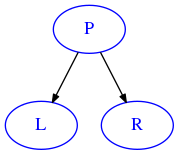

Image saved to file:  img/pl.png


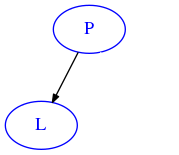

Image saved to file:  img/pr.png


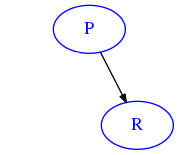

Image saved to file:  img/p.png


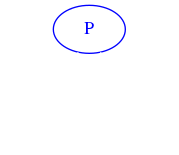

When devising recursive algorithms on binary trees, given a parent node P (in the methods it would be `self`) a good strategy to start with is to consider all possible cases you can have:

|No child|Left child|Right child|Both children|
|:-:|:-:|:-:|:-:|
|![p](img/p.png)|![pl](img/pl.png)|![pr](img/pr.png)|![plr](img/plr.png)|

Let's see an application of the idea.

### 2.1 sum_rec

Supposing all nodes hold a number, let's see how to write a method that returns the sum of all numbers in the tree. We can define sum recursively:

- if a node has no children: the sum is equal to the node data
- if a node has only left child: the sum is equal to the node data plus the (recursive) sum of left child
- if a node has only right child: the sum is equal to the node data plus the (recursive) sum of right child
- if a node has both left and right child: the sum is equal to the node data plus the (recursive) sum of left child and the (recursive) sum of the right child

**Example**: black numbers are node data, purple numbers are the respective sums. 

Let's look at node with black number `10`: its sum is `23`, which is given by its data `10`, plus `1` ( the recursive sum of the left child `1`), plus `12` ( recursive sum of the right child `7`)

![bt sum 9834uu4](img/bt-sum.png)

```python
    def sum_rec(self):
        """ Supposing the tree holds integer numbers in all nodes,
            RETURN the sum of the numbers.

            - implement it as a recursive Depth First Search (DFS) traversal
              NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind            
        """ 
```

**Testing**: `python3 -m unittest bin_tree_test.ContainsRecTest`

**Code example**: 

In [15]:
t = bt(3, 
           bt(10,
                bt(1), 
                bt(7, 
                      bt(5))),
           bt(9, 
                bt(6, 
                       bt(2,
                             None,
                             bt(4)),
                       bt(8))))
print(t)

3
├10
│├1
│└7
│ ├5
│ └
└9
 ├6
 │├2
 ││├
 ││└4
 │└8
 └


In [16]:
t.sum_rec()

55

### 2.2  height_rec

Let's say we want to know the height a tree, which is defined as 'the maximum depth of all the leaves'. We can think recursively as:

- the height of a node without children is 0
- the height of a node with only a left child is the height of the left node plus one
- the height of a node with only a right child is the height of the right node plus one
- the height of a node with both left and right children  is the maximum of the height of the left node and height of the right node, plus one

Look at the example and try to convince yourself this makes sense:

- in purple you see nodes corresponding heights
- notice how leaves have all height 0

![bt height 9893u3](img/bt-height.png)


```python
    def height_rec(self):
        """ RETURN an integer which is the height of the tree

            - implement it as recursive call which does NOT modify the tree
              NOTE: with big trees a recursive solution would surely exceed
                    the call stack, but here we don't mind
            - A tree with only one node has height zero.

```

**Testing:**  `python3 -m unittest bin_tree_test.HeightRecTest`


### 2.3 depth_rec

```python
    def depth_rec(self, level):
        """
            - MODIFIES the tree by putting in the data field the provided 
              value level (which is an integer),
              and recursively calls itself on left and right nodes 
              (if present) passing level + 1
            - implement it as a recursive Depth First Search (DFS) traversal
              NOTE: with big trees a recursive solution would surely exceed
                    the  call stack, but here we don't mind
            - The root of a tree has depth zero.
            - does not return anything
```            

**Testing:**  `python3 -m unittest bin_tree_test.DepthDfsTest`

**Example**: For example, if we take this tree:

In [17]:
t = bt('a', bt('b', bt('c'), None), bt('d', None, bt('e', bt('f'))))

print(t)

a
├b
│├c
│└
└d
 ├
 └e
  ├f
  └


After a call do `depth_rec` on `t` passing 0 as starting level, all letters will be substituted by the tree depth at that point:

In [18]:
t.depth_rec(0)

In [19]:
print(t)

0
├1
│├2
│└
└1
 ├
 └2
  ├3
  └


### 2.4 contains_rec

```python
    def contains_rec(self, item):
        """ RETURN True if at least one node in the tree has data equal 
            to item,  otherwise RETURN False.

            - implement it as a recursive Depth First Search (DFS) traversal
              NOTE: with big trees a recursive solution would surely exceed 
                    the  call stack, but here we don't mind            
        """
```

**Testing**: `python3 -m unittest bin_tree_test.ContainsRecTest`

**Example**: 

In [20]:
t = bt('a',
            bt('b',
                    bt('c'), 
                    bt('d', 
                            None, 
                            bt('e'))),
            bt('f', 
                    bt('g', 
                            bt('h')), 
                    bt('i')))

In [21]:
print(t)

a
├b
│├c
│└d
│ ├
│ └e
└f
 ├g
 │├h
 │└
 └i


In [22]:
t.contains_rec('g')

True

In [23]:
t.contains_rec('z')

False

### 2.5 join_rec

```python
    def join_rec(self):
        """ Supposing the tree nodes hold a character each, RETURN a STRING
            holding all characters IN-ORDER

            - implement it as a recursive Depth First Search (DFS) traversal
              NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind            
        """ 
```

**Testing**: `python3 -m unittest bin_tree_test.JoinRecTest`

In [24]:
t = bt('e', 
            bt('b',
                    bt('a'), 
                    bt('c', 
                            None,
                            bt('d'))),
            bt('h', 
                    bt('g', 
                            bt('f')), 
                    bt('i')))

In [25]:
print(t)

e
├b
│├a
│└c
│ ├
│ └d
└h
 ├g
 │├f
 │└
 └i


In [26]:
t.join_rec()

'abcdefghi'

### 2.6 fun_rec


```python
    def fun_rec(self):
        """ Supposing the tree nodes hold expressions which can either be
            functions or single variables, RETURN a string holding 
            the complete formula with needed parenthesis.

            - implement it as a recursive Depth First Search (DFS)
              PRE-ORDER visit
            - NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind            
        """ 

```

**Testing**: `python3 -m unittest bin_tree_test.FunRecTest`

**Example**:

In [27]:
t = bt('f', 
            bt('g',
                    bt('x'), 
                    bt('y')),
            bt('f', 
                    bt('h', 
                            bt('z')), 
                    bt('w')))

In [28]:
print(t)

f
├g
│├x
│└y
└f
 ├h
 │├z
 │└
 └w


In [29]:
t.fun_rec()

'f(g(x,y),f(h(z),w))'

### 2.7 bin_search_rec

You are given a so-called binary search tree, which holds numbers as data, and all nodes respect this constraint:

- if a node A holds a number strictly less than the number held by its parent node B, then node A must be a left child of B
- if a node C holds a number greater or equal than its parent node B, then node C must be a right child of B

![bt bin search 984uu43](img/bt-bin-search.png)

In [30]:
t = bt(7, 
             bt(3, 
                    bt(2), 
                    bt(6)),
             bt(12, 
                    bt(8, 
                           None,
                           bt(11,
                                 bt(9))),
                    bt(14, 
                           bt(13))))
print(t)

7
├3
│├2
│└6
└12
 ├8
 │├
 │└11
 │ ├9
 │ └
 └14
  ├13
  └


Implement following method:


```python
    
    def bin_search_rec(self, m):
        """ Assuming the tree is a binary search tree of integer numbers, 
            RETURN True if m is present in the tree, False otherwise
        
            - MUST EXECUTE IN O(height(t))
            - NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind
        """        
        
```

- **QUESTION**: what is the complexity in worst case scenario?
- **QUESTION**: what is the complexity when tree is balanced?

**Testing**: `python3 -m unittest bin_tree_test.BinSearchRecTest`

### 2.8 univalued_rec

```python
    def univalued_rec(self):
        """ RETURN True if the tree is univalued, otherwise RETURN False. 

            - a tree is univalued when all nodes have the same value as data
            - MUST execute in O(n) where n is the number of nodes of the tree
            - NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind
        """
```

**Testing**: `python3 -m unittest bin_tree_test.UnivaluedRecTest`

**Example**: 

In [31]:
t = bt(3, bt(3), bt(3, bt(3, bt(3, None, bt(3)))))
print(t)

3
├3
└3
 ├3
 │├3
 ││├
 ││└3
 │└
 └


In [32]:
t.univalued_rec()

True

In [33]:
t = bt(2, bt(3), bt(6, bt(3, bt(3, None, bt(3)))))
print(t)

2
├3
└6
 ├3
 │├3
 ││├
 ││└3
 │└
 └


In [34]:
t.univalued_rec()

False

### 2.9 same_rec

```python
    def same_rec(self, other):
        """ RETURN True if this binary tree is equal to other binary tree,
            otherwise return False.
            
            - MUST execute in O(n) where n is the number of nodes of the tree
            - NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind
            - HINT: defining a helper function 
                    
                    def helper(t1, t2):

                    which recursively calls itself and assumes both of the
                    inputs can be None may reduce the number of ifs to write.
        """
```

**Testing**: `python3 -m unittest bin_tree_test.SameRecTest`

### 2.10 sum_leaves_rec

We will now go looking for leaves, that is, nodes with no children:

![bt leaves numbers 98udfuj](img/bt-leaves-numbers.png)


✪✪ Implement this method:

```python    
    def sum_leaves_rec(self):
        """ Supposing the tree holds integer numbers in all nodes,
            RETURN the sum of ONLY the numbers in the leaves.

            - a root with no children is considered a leaf
            - implement it as a recursive Depth First Search (DFS) traversal
              NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind            
        """ 
```     

**Testing**: `python3 -m unittest bin_tree_test.SumLeavesRecTest`

**Example**: 

In [35]:
t = bt(3, 
        bt(10,
                bt(1), 
                bt(7, 
                    bt(5))),
        bt(9, 
                bt(6, 
                    bt(2,
                            None,
                            bt(4)),
                    bt(8))))

t.sum_leaves_rec()  #  1 + 5 + 4 + 8

18

### 2.11 schedule_rec

Suppose the nodes of a binary tree represent tasks (nodes data is the task label). Each task may have up to two subtasks, represented by its children. To be declared as completed, each task requires first the completion of all of its subtasks.

We want to create a schedule of tasks, so that to declare completed the task at the root of the tree, before all tasks below it must be  completed, specifically first the tasks on the left side, and then the tasks on the right side. If you apply this reasoning recursively, you can obtain a schedule of tasks to be executed.


```python
    def schedule_rec(self):
        """ RETURN a list of task labels in the order they will be completed.

            - Implement it with recursive calls.
            - MUST run in O(n) where n is the size of the tree
            
            NOTE: with big trees a recursive solution would surely
                  exceed the call stack, but here we don't mind
        """
```

**Testing**: `python3 -m unittest bin_tree_test.ScheduleRecTest`

**Example**:

For this tree, it should return the schedule `['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']`

In [36]:
from bin_tree_sol import *
from bin_tree_test import bt

In [37]:
tasks = bt('i',
                bt('d', 
                        bt('b',
                                bt('a')),
                        bt('c')),
                bt('h',
                        bt('f',
                                None,
                                bt('e')),
                        bt('g')))


In [38]:
print(tasks)

i
├d
│├b
││├a
││└
│└c
└h
 ├f
 │├
 │└e
 └g


In [39]:
tasks.schedule_rec()

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

### 2.12 paths

We define a _data path_ from a node $v$ to a node $w$ as the sequence of all nodes *data* we can collect going from node $v$ included to node $w$ included. 

Let's take an example tree:

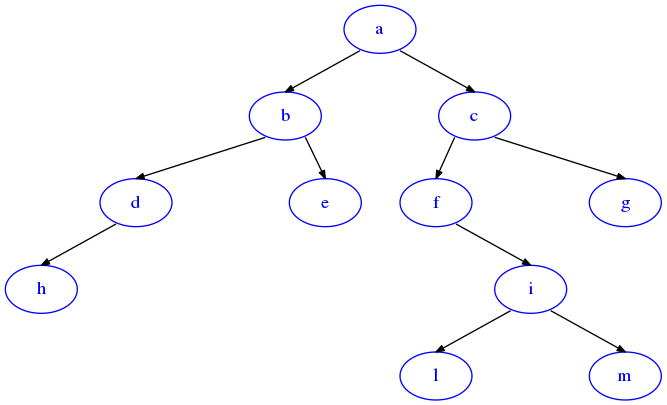

In [40]:
from bin_tree_sol import *
from bin_tree_test import bt

t = bt('a',
                bt('b', 
                        bt('d',
                                bt('h')),
                        bt('e')),
                bt('c',
                        bt('f',
                                None,
                                bt('i', 
                                         bt('l'),
                                         bt('m'))),
                        bt('g')))

from sciprog import draw_bt
draw_bt(t)

Suppose we want to write a method to RETURN a list of all possible data paths from the root to each leaf. In this case, the paths would be:

In [41]:
t.paths_slow_rec()

[['a', 'b', 'd', 'h'],
 ['a', 'b', 'e'],
 ['a', 'c', 'f', 'i', 'l'],
 ['a', 'c', 'f', 'i', 'm'],
 ['a', 'c', 'g']]

To solve the problem we can reason recursively:

- if a node $p$ has no children, then there is only one path from it to itself, so we return `[ [p._data] ]` (a list of one path)
- if a node $p$ has a left child $l$, a recursive call to `p._left.paths_slow_rec()` would produce all paths  starting from `p._left` and going to leaves: to obtain all paths starting from `p` and passing through the left node,  we would simply need to prepend `p._data` to all lists obtained from the recursive call
- for the right node, the reasoning would be similar
- at the end of the algorithm, you would need to collect all processed lists obtained before in a single big list to return

In worst case scenario, what would the complexity be? Let's see a degenerate tree which is all on a single right branch except interleved small left branches like this:

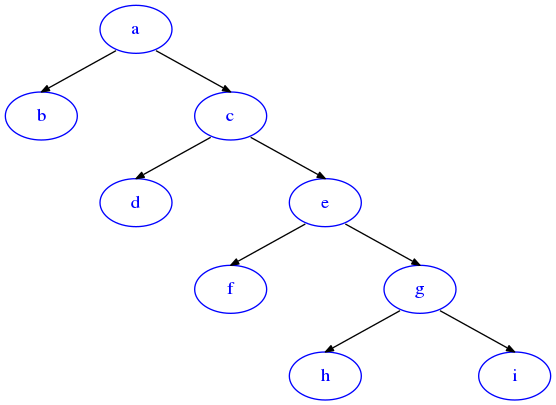


Odd nodes  will have to be present in these number of paths:

$$
\begin{align*}
a&: n/2 \\
c&: n/2 - 1\\
e&: n/2 - 2\\
g&: n/2 - 3\\
.\\
.\\
.\\
\end{align*}
$$

Even nodes $b$, $d$, ... would be leaves thus present only in one path each.

$$ \text{odd nodes paths} + \text{even nodes paths}  = \frac{(n/2)^2 + n/2}{2} + n/2 = \frac{n^2}{8} + \frac{3n}{4}$$

So in this worst case we would need at least $O(n^2)$ to produce the required number of cells with _any_ algorithm. 

### 2.12.1 paths_slow_rec

If we apply the afore mentioned reasoning directly, thus _prepending_ stuff to the obtained results from recursive calls with `+` operator or `.extend()`, we would keep rewriting results obtained from recurrent calls into new lists, ending up with an $O(n^3)$ algorithm.

To get an idea of the problem, for a first version this can be fine as long as we are aware of the hidden costs, so:

- **USE** `+` operator or `.extend` method to augment lists
- **DO NOT** use `.append` (we will reserve it for the fast implementation)

```python
def paths_slow_rec(self):
        """ RETURN a list of all paths from this node to the each leaf.
            A path is a list which holds the nodes data found while 
            traversing the tree.
                                    
            - for this slow version, you can only use + operator or .extend()
              method which will bring an O(n^3) complexity
            - implement it as recursive call 
              NOTE: with big trees a recursive solution would surely exceed 
                    the call stack, but here we don't mind                          
        """
```        

**Testing**: `python3 -m unittest bin_tree_test.PathsSlowRecTest`

Example:

In [43]:
t = bt('a',
                bt('b', 
                        bt('d',
                                bt('h')),
                        bt('e')),
                bt('c',
                        bt('f',
                                None,
                                bt('i', 
                                         bt('l'),
                                         bt('m'))),
                        bt('g')))

t.paths_slow_rec()

[['a', 'b', 'd', 'h'],
 ['a', 'b', 'e'],
 ['a', 'c', 'f', 'i', 'l'],
 ['a', 'c', 'f', 'i', 'm'],
 ['a', 'c', 'g']]

### 2.12.2 paths_fast_rec

The previous version is expensive, so let's try to implement a faster one by only using `append()` on results produced by recursive calls.

- you will also need to implement a helper method.
- notice lists this way will come up reversed, you will need to fix them before final return

```python
    def _paths_fast_helper(self):
        """ DO NOT use + operator nor .extend() method         
        """
        
                        
    def paths_fast_rec(self):
        """ RETURN a list of all paths from this node to the each leaf.
            A path is a list which holds the nodes data found while traversing
            the tree.
                        
            - DO NOT use + operator nor .extend() method
            - MUST work in O(n^2) where n is the number of nodes in the tree
            - implement it as recursive call 
              NOTE: with big trees a recursive solution would surely exceed 
                    the call stack, but here we don't mind                          
        """        
```        

**Testing**: `python3 -m unittest bin_tree_test.PathsFastRecTest`

Example: 

In [44]:
t = bt('a',
                bt('b', 
                        bt('d',
                                bt('h')),
                        bt('e')),
                bt('c',
                        bt('f',
                                None,
                                bt('i', 
                                         bt('l'),
                                         bt('m'))),
                        bt('g')))

t.paths_fast_rec()

[['a', 'b', 'd', 'h'],
 ['a', 'b', 'e'],
 ['a', 'c', 'f', 'i', 'l'],
 ['a', 'c', 'f', 'i', 'm'],
 ['a', 'c', 'g']]

## 3. Stack visit

To avoid getting 'Recursion limit exceeded' errors which can happen with Python, instead of using recursion we can implement tree operations with a while cycle and a stack (or a queue, depending on the case). 

Typically, in these algorithms you follow this recipe:

- at the beginning you put inside the stack the current node on which the method is called
- you keep executing the while until the stack is empty
- inside the while, you pop the stack and do some processing on the popped node data
- if the node has children, you put them on the stack

We will try to reimplement this way methods we've already seen.

### 3.1 sum_stack

Implement `sum_stack`

```python
    def sum_stack(self):
        """ Supposing the tree holds integer numbers in all nodes,
            RETURN the sum of the numbers.
            
            - DO *NOT* use recursion
            - implement it with a while and a stack (as a python list)
            - In the stack place nodes to process
        """ 

```

**Testing**: `python3 -m unittest bin_tree_test.SumStackTest`

![bt su iuiu4383](img/bt-sum.png)

### 3.3 height_stack

The idea of this function is not that different from the [Tasks do_level exercise](https://sciprog.davidleoni.it/stacks/stacks.html#5.2-do_level) we've seen in the lab about stacks

```python
    def height_stack(self):
        """ RETURN an integer which is the height of the tree

            - A tree with only one node has height zero.
            - DO *NOT* use recursion
            - implement it with a while and a stack (as a python list). 
            - In the stack place *tuples* holding a node *and* its level
            
        """
```

**Testing**: `python3 -m unittest bin_tree_test.HeightStackTest`

![bt height 989uure](img/bt-height.png)

### 3.3 leaves_stack

✪✪✪ Implement this method:

```python
    def leaves_stack(self):
        """ RETURN a list holding the *data* of all the leaves  of the tree,
            in left to right order.

            - a root with no children is considered a leaf
            - DO *NOT* use recursion
            - implement it with a while and a stack (as a Python list)            
        """        
```

**Testing**: `python3 -m unittest bin_tree_test.LeavesStackTest`

**Example:**

In [45]:

t = bt('a', 
            bt('b',
                    bt('c'), 
                    bt('d', 
                            None,
                            bt('e'))),
            bt('f', 
                    bt('g', 
                            bt('h')), 
                    bt('i')))
t.leaves_stack()

['c', 'e', 'h', 'i']

### 3.4 others

Hopefully you got an idea of how stack recursion works, now you could try to implement by yourself previously defined recursive functions, this time using a while and a stack (or a queue, depending on what you are trying to achieve).

## 4. Queue visit

Let's see what happens when we visit a tree using a queue instead of a stack:



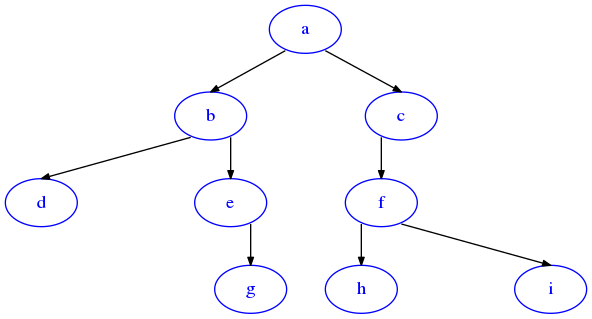

In [46]:
from bin_tree_test import bt
from sciprog import draw_bt
t = bt('a', 
            bt('b',
                    bt('d'), 
                    bt('e', 
                            None,
                            bt('g'))),
            bt('c',                      
                    bt('f',
                           bt('h'),
                           bt('i'))))
draw_bt(t)

In [47]:
from queue import deque
q = deque()
q.append((t, 0))     # we enqueue at the *right*

while len(q) > 0:
    node, level = q.popleft()   # we dequeue from the *left*
    print('level:', level, '  node:', node.data())    
    
    if node.left():
        q.append((node.left(), level + 1))
    if node.right():
        q.append((node.right(), level + 1))    

level: 0   node: a
level: 1   node: b
level: 1   node: c
level: 2   node: d
level: 2   node: e
level: 2   node: f
level: 3   node: g
level: 3   node: h
level: 3   node: i


We see nodes are traversed level by level, in what can be called a bread-first search (BFS)

Since in this case we enqueued first left and then right child, the traversal in each level will be left-to-right.

Currently we do not provide exercises for levels, but you might need this exploration technique to solve some of the exercises in the [references](https://sciprog.davidleoni.it/references.html#LeetCode-Trees) page.

## 5. Modifying the tree

### 5.1 bin_insert_rec

```python
def bin_insert_rec(self, m):
    """ Assuming the tree is a binary search tree of integer numbers, 
        MODIFIES the tree by inserting a new node with the value m
        in the appropriate position. Node is always added as a leaf.

        - MUST EXECUTE IN O(height(t))
        - NOTE: with big trees a recursive solution would surely 
                exceed the call stack, but here we don't mind
    """
```     

**Testing**: `python3 -m unittest bin_tree_test.BinInsertRecTest`

**Example**:

In [48]:

t = bt(7)
print(t)

7


In [49]:
t.bin_insert_rec(3)
print(t)

7
├3
└


In [50]:
t.bin_insert_rec(6)
print(t)

7
├3
│├
│└6
└


In [51]:
t.bin_insert_rec(2)
print(t)

7
├3
│├2
│└6
└


In [52]:
t.bin_insert_rec(12)
print(t)

7
├3
│├2
│└6
└12


In [53]:
t.bin_insert_rec(14)
print(t)

7
├3
│├2
│└6
└12
 ├
 └14


In [54]:
t.bin_insert_rec(13)
print(t)

7
├3
│├2
│└6
└12
 ├
 └14
  ├13
  └


In [55]:
t.bin_insert_rec(8)
print(t)

7
├3
│├2
│└6
└12
 ├8
 └14
  ├13
  └


In [56]:
t.bin_insert_rec(11)
print(t)

7
├3
│├2
│└6
└12
 ├8
 │├
 │└11
 └14
  ├13
  └


In [57]:
t.bin_insert_rec(9)
print(t)

7
├3
│├2
│└6
└12
 ├8
 │├
 │└11
 │ ├9
 │ └
 └14
  ├13
  └


### 5.2 add_row

![tree iu9fidomnv](img/bt-tree-last-row.jpg)

```python
    def add_row(self, elems):
        """ Takes as input a list of data and MODIFIES the tree by adding
            a row of new leaves, each having as data one element of elems,
            in order.
            
            - elems size can be less than 2*|leaves|
            - if elems size is more than 2*|leaves|, raises ValueError
            - for simplicity, you can assume assume self is a perfect 
              binary tree, that is a binary tree in which all interior nodes 
              have two children and all leaves have the same depth
            - MUST execute in O(n+|elems|)  where n is the size of the tree
            - DO *NOT* use recursion
            - implement it with a while and a stack (as a Python list)
        """        
```


**Test**: `python3 -m unittest bin_tree_test.AddRowTest`

**Example**: 

In [58]:
from bin_tree_sol import *
from bin_tree_test import bt

t = bt('a', 
            bt('b',
                    bt('d'), 
                    bt('e')),
            bt('c', 
                    bt('f'),                                    
                    bt('g')))

print(t)

a
├b
│├d
│└e
└c
 ├f
 └g


In [59]:
t.add_row(['h','i','j','k','l'])

In [60]:
print(t)

a
├b
│├d
││├h
││└i
│└e
│ ├j
│ └k
└c
 ├f
 │├l
 │└
 └g


### 5.3 prune_rec


Implement the method `prune_rec`:

```python
    def prune_rec(self, el):
        """ MODIFIES the tree by cutting all the subtrees that have their 
            root node data equal to el. By 'cutting' we mean they are no longer linked 
            by the tree on which prune is called.

            - if prune is called on a node having data equal to el, raises ValueError
            
            - MUST execute in O(n) where n is the number of nodes of the tree
            - NOTE: with big trees a recursive solution would surely 
                    exceed the call stack, but here we don't mind
        """
```

**Testing**: `python3 -m unittest bin_tree_test.PruneRecTest`

**Example**:

In [61]:
from bin_tree_sol import *
from bin_tree_test import bt

In [62]:
t = bt('a',
            bt('b',
                   bt('z'),
                   bt('c',
                        bt('d'),
                        bt('z',
                               None,
                               bt('e')))),
            bt('z', 
                   bt('f'),
                   bt('z', 
                          None,
                          bt('g'))))

In [63]:
print(t)

a
├b
│├z
│└c
│ ├d
│ └z
│  ├
│  └e
└z
 ├f
 └z
  ├
  └g


In [64]:
t.prune_rec('z')

In [65]:
print(t)

a
├b
│├
│└c
│ ├d
│ └
└


In [66]:
t.prune_rec('c')

In [67]:
print(t)

a
├b
└


Trying to prune the root will throw a `ValueError`:

```python
t.prune_rec('a')

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-27-f8e8fa8a97dd> in <module>()
----> 1 t.prune_rec('a')

ValueError: Tried to prune the tree root !
```    

In [68]:
# ignore this cell
import bin_tree_test
jupman.run(bin_tree_test)


...............................................................................................................................
----------------------------------------------------------------------
Ran 127 tests in 0.119s

OK
